In [1]:
import pandas as pd
import numpy as np

## Reading Dataset

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- There is no categorical data.

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- There is no null values present.

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Min value for pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI is zero. This can't be correct as one can not have zero BloodPressure.
- This means that there is missing value in the form of 0.
- We have to handle these values
- We can use mean or median for filling 0 values

- As there is no significance difference between mean and median(50%), we can use mean as filling values. 

In [9]:
df['Glucose']= df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure']= df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness']= df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin']= df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

                                     

- Pregnancies can have zero values as minimum.

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
## Handle duplicate values

duplicate_rows_data=df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (0, 9)


- No duplicate is present.

## Visualization

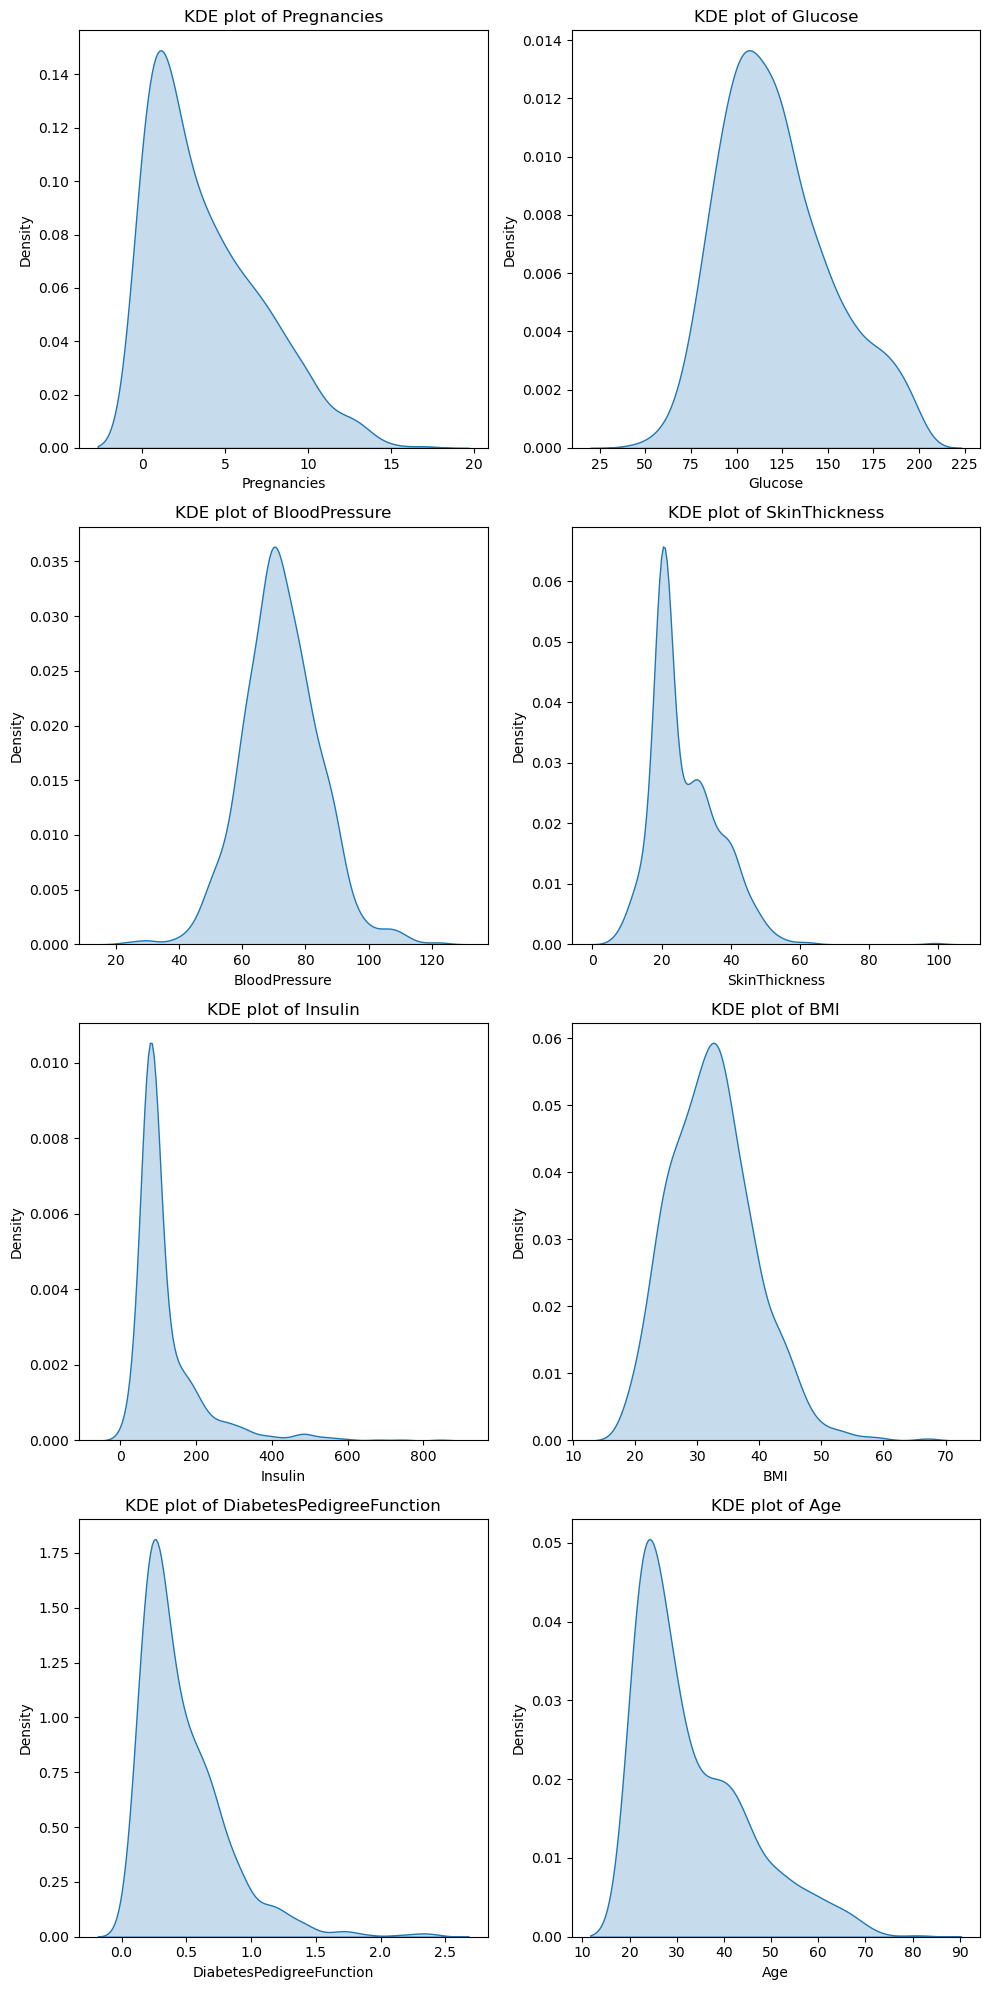

In [12]:
#Kernel Density Estimate (KDE) plots for each variable

num_columns= len(df.columns.drop('Outcome'))
num_rows= (num_columns+1)//2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(df.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[column], fill=True)
    plt.title(f'KDE plot of {column}')
    
plt.tight_layout()
plt.show()

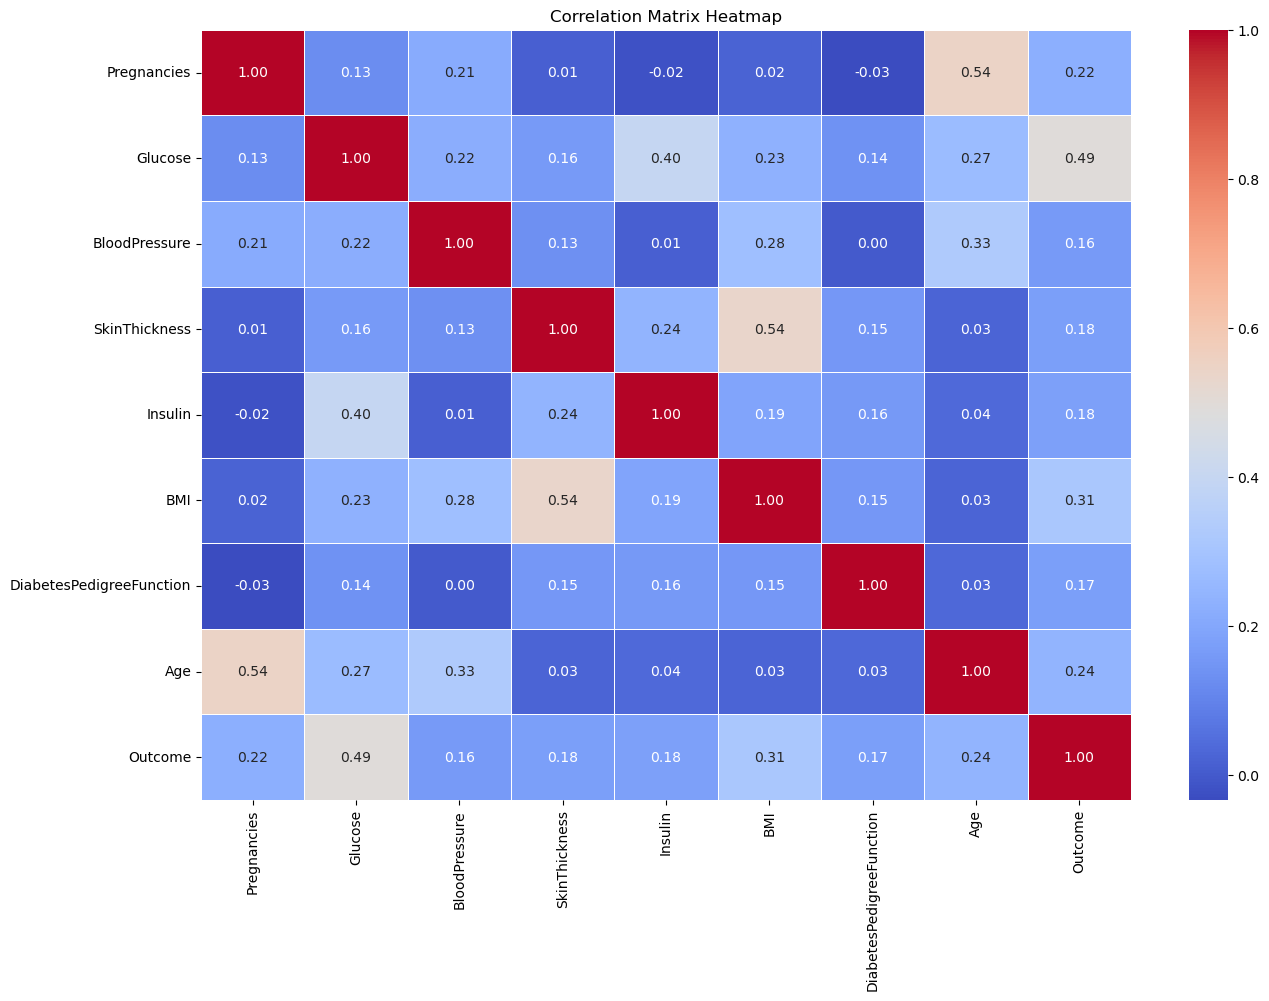

In [13]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

- There is no multicollinearity present.

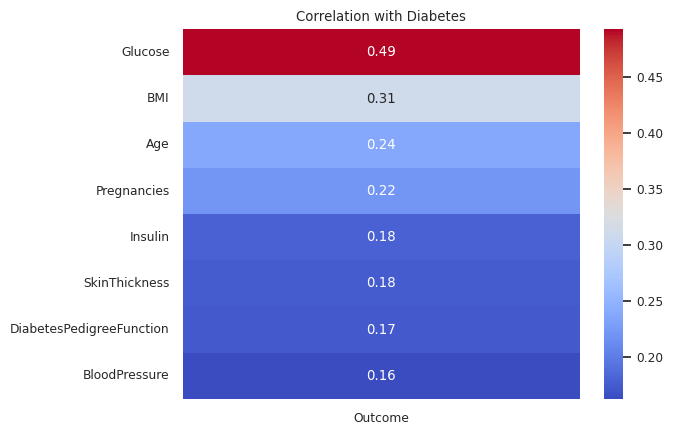

In [14]:
corr= df.corr()
target_corr = corr['Outcome'].drop('Outcome')

target_corr_sorted= target_corr.sort_values(ascending = False)

sns.set(font_scale=0.8)
sns.set_style('white')
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title("Correlation with Diabetes")
plt.show()

- With a correlation of 0.49, Glucose is the most strongly correlated feature with the outcome. This suggests that higher glucose levels could be a significant indicator of diabetes.
- BMI can be also important factor in diabetes.

<AxesSubplot: >

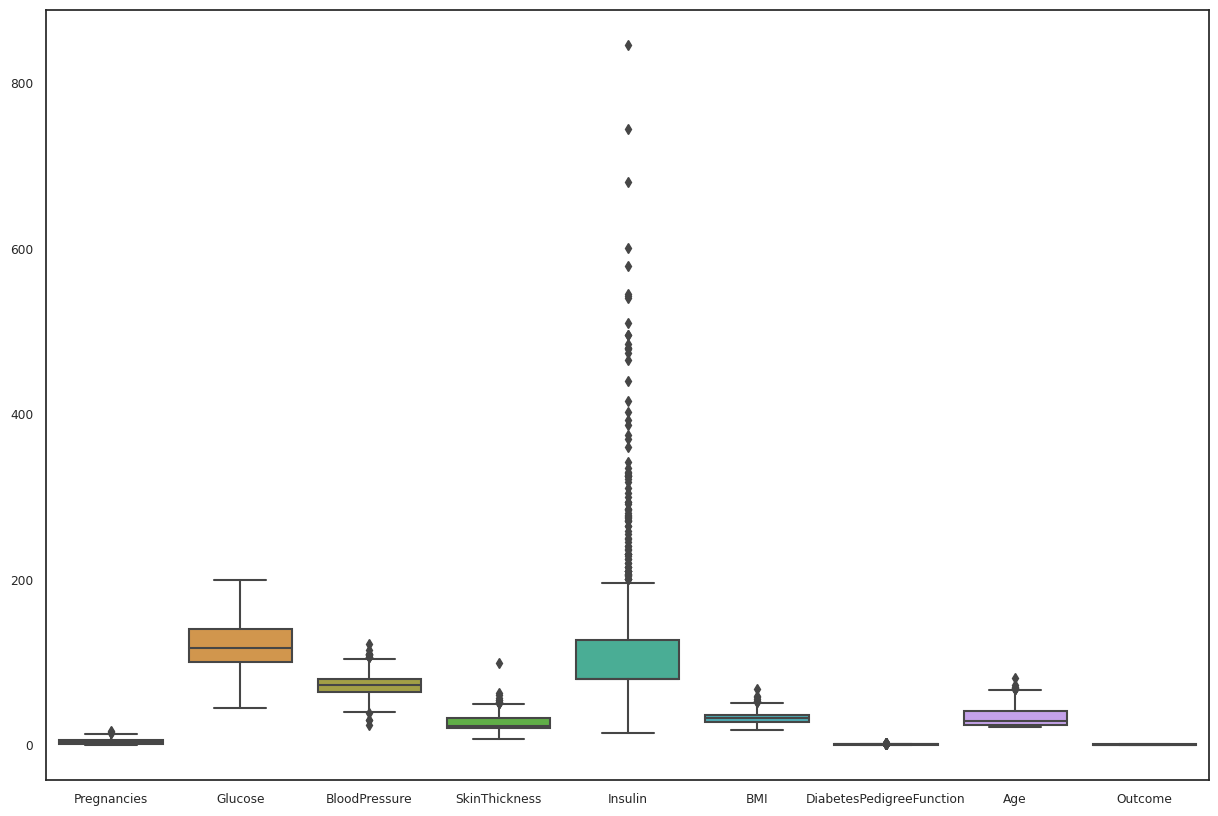

In [15]:
plt.figure(figsize=(15, 10))
sns.boxplot(df)

- There are many outliers in insulin, which can be handled using scalling the data

## Data splitting and scalling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pickle

- Splitting

In [17]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [18]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [19]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [20]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.30, random_state=30)

In [21]:
x_train.shape, y_train.shape

((537, 8), (537,))

In [22]:
x_test.shape, y_test.shape

((231, 8), (231,))

## Scalling

In [23]:
def std_scaler(x_train, x_test):
    scaler= StandardScaler()
    x_train_scaled= scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    ##Saving the pickle of scaler
    file = open('StandardScaler.pkl','wb')
    pickle.dump(scaler, file)
    file.close()
    
    return x_train_scaled, x_test_scaled

In [25]:
x_train_scaled, x_test_scaled= std_scaler(x_train, x_test)

In [26]:
x_train_scaled[:5]

array([[-0.84683171, -0.66549311,  0.12373527, -0.62954654, -0.41643345,
         0.98331968, -0.54773782,  0.69285995],
       [ 2.21544863, -1.2277813 ,  0.12373527, -0.62954654, -0.41643345,
        -0.33469282, -0.527377  ,  0.11370483],
       [-0.84683171, -0.16935648, -1.05505077, -0.37925901, -0.13848747,
         0.18409934, -0.04453488, -0.54818672],
       [-0.23437565, -1.3600844 ,  1.13412331, -1.09043542, -0.56282404,
        -0.69924946, -0.50992488, -0.96186895],
       [ 1.60299256,  0.02909817, -0.21306074,  1.75427024, -0.26578844,
         0.08594947, -0.31213413,  0.52738706]])

In [27]:
x_test_scaled[:5]

array([[-1.15305975, -0.69856889,  0.29213328, -0.62954654, -0.41643345,
         0.45050612, -0.82406313, -0.63092317],
       [-0.23437565, -0.53319001, -1.56024479, -0.58245227,  0.41315006,
        -0.22252154, -0.5506465 , -0.79639606],
       [ 1.90922059, -1.55853905,  0.7973273 , -0.62954654, -0.41643345,
         0.11399229, -0.63499844,  0.36191417],
       [-0.84683171,  0.72368946,  0.7973273 ,  1.34788371, -0.41643345,
         1.23570505,  0.36559006, -0.46545028],
       [ 0.07185239, -0.26858381, -0.71825476, -0.62954654, -0.41643345,
        -0.50294973, -1.03348863, -0.79639606]])

## Models Training

### MODEL 1 - Logistic Regression

In [28]:
Model1= LogisticRegression()

In [29]:
Model1.fit(x_train_scaled, y_train)

LogisticRegression()

In [31]:
y_pred1 = Model1.predict(x_test_scaled)
y_pred1

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [32]:
print('This is the confusion matrix for Logistic Regression :\n', confusion_matrix(y_test, y_pred1))
print('\n')
print('This is the Accuracy for the Logistic Regression :\n', accuracy_score(y_test, y_pred1))
print('\n')
print('This is the classification report for the Logistic Regression :\n \n' , classification_report(y_test,y_pred1))

This is the confusion matrix for Logistic Regression :
 [[140  19]
 [ 27  45]]


This is the Accuracy for the Logistic Regression :
 0.8008658008658008


This is the classification report for the Logistic Regression :
 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       159
           1       0.70      0.62      0.66        72

    accuracy                           0.80       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.80      0.80      0.80       231



- Accuracy of the model is 0.74
- FN and FP both values are important here so we also consider precision, recall and f1-score as important factors, but they are also has good amount of values.

### MODEL 2 - Logistic Regression using Hypertunning

In [33]:
## Hypertunning
## GridSearchCv
from sklearn.model_selection import GridSearchCV

In [34]:
parameters = {
    'penalty': ['l1','l2','elasticnet', None],
    'C' : np.logspace(-3, 3, 7),
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newtorn-cholesky', 'sag', 'saga']
}

In [37]:
Model2 = LogisticRegression()
clf = GridSearchCV(
     Model2,
    param_grid = parameters,
    scoring = 'accuracy',
    cv=10)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newtorn-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [38]:
## Best parameters
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [39]:
clf.best_score_

0.759643605870021

In [40]:
Model2= LogisticRegression(C= 0.1, penalty= 'l1', solver='saga')
Model2.fit(x_train_scaled, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [41]:
y_pred2 = Model2.predict(x_test_scaled)

In [42]:
print('This is the confusion matrix for GridSearchCV :\n', confusion_matrix(y_test, y_pred2))
print('\n')
print('This is the Accuracy for GridSearchCV :\n', accuracy_score(y_test, y_pred2))
print('\n')
print('This is the classification report for GridSearchCV :\n \n' , classification_report(y_test, y_pred2) )


This is the confusion matrix for GridSearchCV :
 [[142  17]
 [ 31  41]]


This is the Accuracy for GridSearchCV :
 0.7922077922077922


This is the classification report for GridSearchCV :
 
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       159
           1       0.71      0.57      0.63        72

    accuracy                           0.79       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.79      0.79      0.79       231



- Accuracy of the model is 0.79
- FN and FP both values are important here so we also consider precision, recall and f1-score as important factors, but they are also has good amount of values.

### MODEL 3- Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
Model3 = DecisionTreeClassifier(criterion = 'entropy')

In [46]:
Model3.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4685344827586207, 0.96875, 'x[1] <= 0.178\nentropy = 0.947\nsamples = 537\nvalue = [341, 196]'),
 Text(0.15258620689655172, 0.90625, 'x[5] <= -0.846\nentropy = 0.749\nsamples = 341\nvalue = [268, 73]'),
 Text(0.06551724137931035, 0.84375, 'x[4] <= -0.748\nentropy = 0.089\nsamples = 89\nvalue = [88, 1]'),
 Text(0.05172413793103448, 0.78125, 'x[1] <= -0.599\nentropy = 0.503\nsamples = 9\nvalue = [8, 1]'),
 Text(0.03793103448275862, 0.71875, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.06551724137931035, 0.71875, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07931034482758621, 0.78125, 'entropy = 0.0\nsamples = 80\nvalue = [80, 0]'),
 Text(0.2396551724137931, 0.84375, 'x[7] <= -0.341\nentropy = 0.863\nsamples = 252\nvalue = [180, 72]'),
 Text(0.1206896551724138, 0.78125, 'x[5] <= 1.811\nentropy = 0.561\nsamples = 137\nvalue = [119, 18]'),
 Text(0.09310344827586207, 0.71875, 'x[5] <= 0.801\nentropy = 0.488\nsamples = 132\nvalue = [118, 14]'),
 Text(0.079310344827

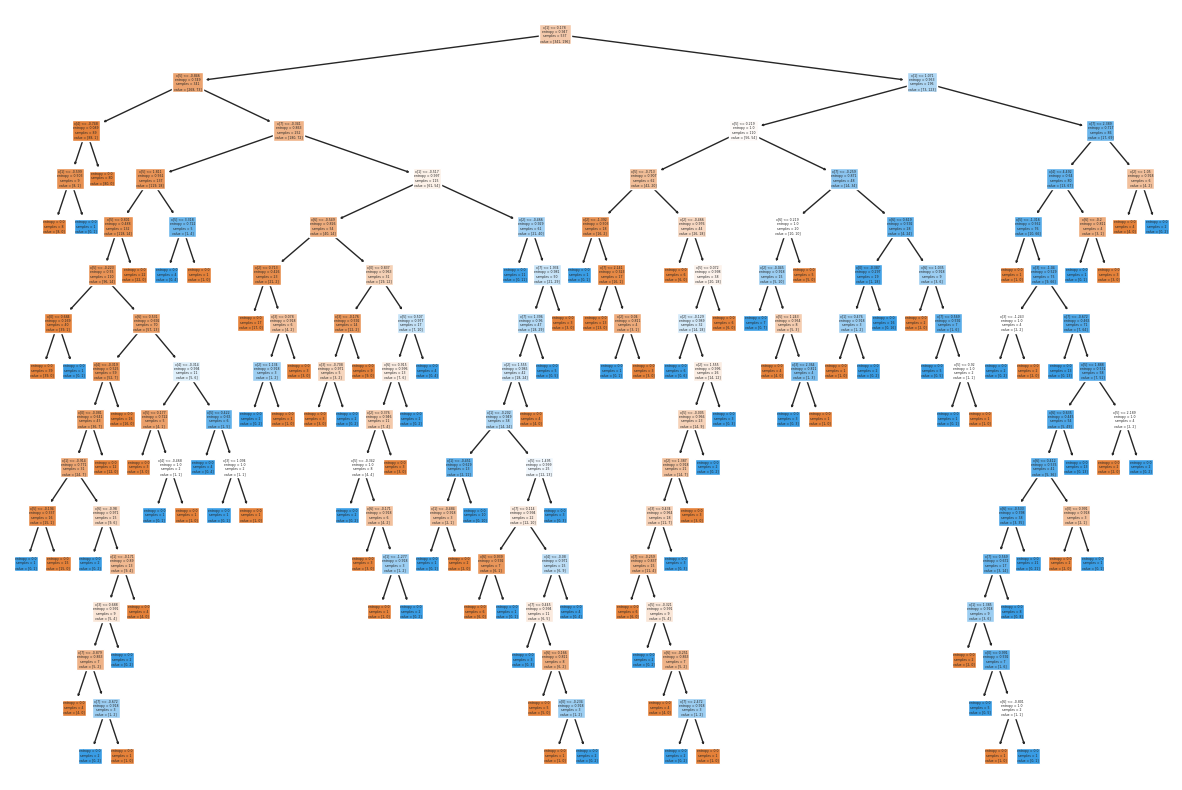

In [47]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(Model3, filled= True)

In [48]:
y_pred3= Model3.predict(x_test_scaled)

In [59]:
print('This is the confusion matrix for DecisionTreeClassifier :\n', confusion_matrix(y_test, y_pred3))
print('\n')
print('This is the Accuracy for DecisionTreeClassifier :\n', accuracy_score(y_test, y_pred3))
print('\n')
print('This is the classification report for DecisionTreeClassifier :\n \n' , classification_report(y_test, y_pred3))

This is the confusion matrix for DecisionTreeClassifier :
 [[121  38]
 [ 26  46]]


This is the Accuracy for DecisionTreeClassifier :
 0.7229437229437229


This is the classification report for DecisionTreeClassifier :
 
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       159
           1       0.55      0.64      0.59        72

    accuracy                           0.72       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.74      0.72      0.73       231



- Accuracy of the model is 0.72
- FN and FP both values are important here so we also consider precision, recall and f1-score as important factors, but they are also has good amount of values.

### MODEL 4- Decision Tree using hypertunning

In [66]:
parameter= {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1, 2,3 ,4, 5],
    'max_features' : ['auto', 'sqrt', 'log2']}

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
treeclassifier = DecisionTreeClassifier()
Model4 = GridSearchCV(treeclassifier , param_grid=parameter, cv=3, scoring='accuracy')

In [69]:
Model4.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [70]:
Model4.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [74]:
Model4 = DecisionTreeClassifier(criterion='entropy',
 max_depth=5,
 max_features='auto',
 splitter='best')
Model4.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto')

[Text(0.5815217391304348, 0.9166666666666666, 'x[0] <= 0.837\nentropy = 0.947\nsamples = 537\nvalue = [341, 196]'),
 Text(0.33152173913043476, 0.75, 'x[1] <= -0.252\nentropy = 0.891\nsamples = 425\nvalue = [294, 131]'),
 Text(0.17391304347826086, 0.5833333333333334, 'x[3] <= 0.281\nentropy = 0.478\nsamples = 204\nvalue = [183, 21]'),
 Text(0.08695652173913043, 0.4166666666666667, 'x[1] <= -0.914\nentropy = 0.341\nsamples = 142\nvalue = [133, 9]'),
 Text(0.043478260869565216, 0.25, 'x[2] <= 0.04\nentropy = 0.129\nsamples = 56\nvalue = [55, 1]'),
 Text(0.021739130434782608, 0.08333333333333333, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(0.06521739130434782, 0.08333333333333333, 'entropy = 0.371\nsamples = 14\nvalue = [13, 1]'),
 Text(0.13043478260869565, 0.25, 'x[7] <= 0.155\nentropy = 0.446\nsamples = 86\nvalue = [78, 8]'),
 Text(0.10869565217391304, 0.08333333333333333, 'entropy = 0.253\nsamples = 71\nvalue = [68, 3]'),
 Text(0.15217391304347827, 0.08333333333333333, 'entro

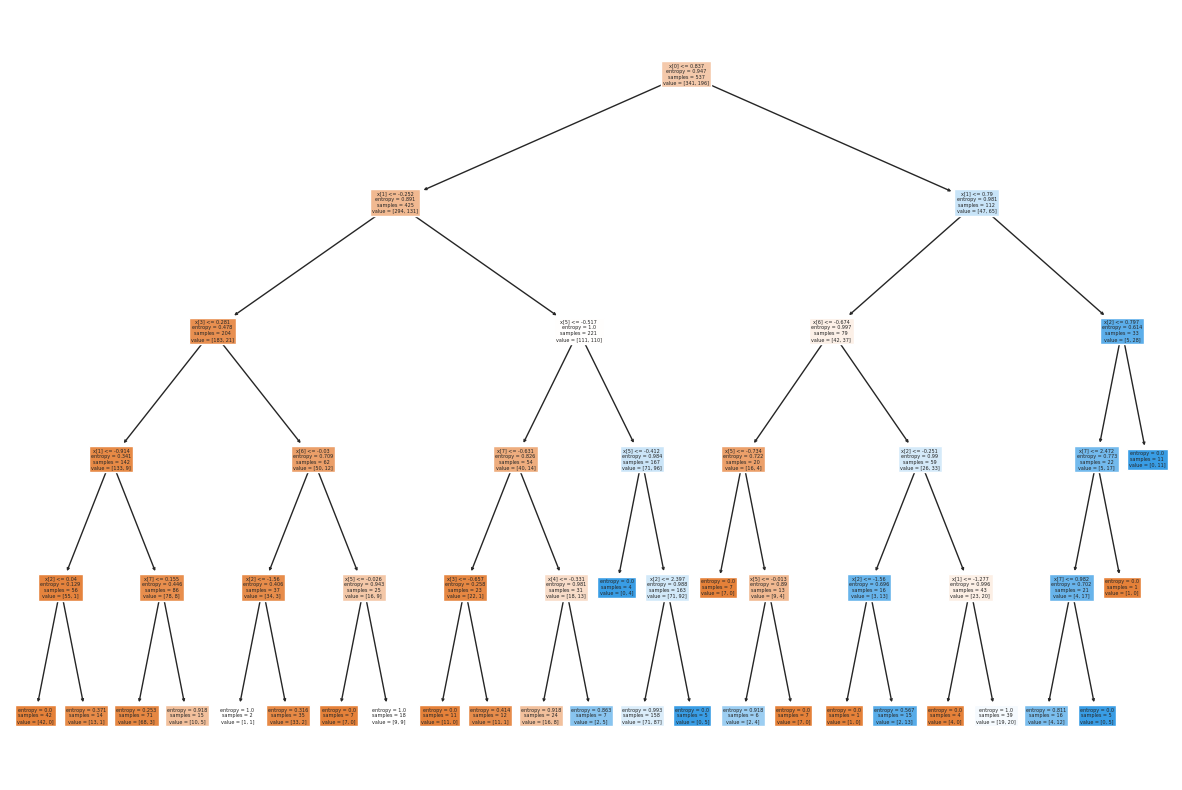

In [75]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(Model4, filled=True)

In [76]:
y_pred4 = Model4.predict(x_test_scaled)

In [77]:
print('This is the confusion matrix  :\n', confusion_matrix(y_test, y_pred4))
print('\n')
print('This is the Accuracy  :\n', accuracy_score(y_test, y_pred4))
print('\n')
print('This is the classification report:\n \n' , classification_report(y_test, y_pred4))

This is the confusion matrix  :
 [[111  48]
 [ 12  60]]


This is the Accuracy  :
 0.7402597402597403


This is the classification report:
 
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       159
           1       0.56      0.83      0.67        72

    accuracy                           0.74       231
   macro avg       0.73      0.77      0.73       231
weighted avg       0.79      0.74      0.75       231



- Accuracy of the model is 0.74
- FN and FP both values are important here so we also consider precision, recall and f1-score as important factors, but they are also has good amount of values.

### MODEL 5- Support Vector

In [78]:
## Support Vector Classifier Wish hyperparameter Tunning

## Defining parameter range

param_grid = {'C': [0.1, 1],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear', 'rbf', 'polynomial']
             }

In [79]:
from sklearn.svm import SVC
Model5= GridSearchCV(SVC(), param_grid = param_grid, refit = True, cv=3, scoring ='accuracy')

Model5.fit(x_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy')

In [80]:
Model5.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [81]:
Model5 = SVC(C=0.1, gamma=1, kernel='linear')

In [82]:
Model5

SVC(C=0.1, gamma=1, kernel='linear')

In [83]:
Model5.fit(x_train_scaled, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [84]:
y_pred5 = Model5.predict(x_test_scaled)

In [85]:
print('This is the confusion matrix :\n', confusion_matrix(y_test, y_pred5))
print('\n')
print('This is the Accuracy :\n', accuracy_score(y_test, y_pred5))
print('\n')
print('This is the classification report :\n \n' , classification_report(y_test, y_pred5))

This is the confusion matrix :
 [[139  20]
 [ 28  44]]


This is the Accuracy :
 0.7922077922077922


This is the classification report :
 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       159
           1       0.69      0.61      0.65        72

    accuracy                           0.79       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.79      0.79      0.79       231



- Accuracy of the model is 0.79
- FN and FP both values are important here so we also consider precision, recall and f1-score as important factors, but they are also has good amount of values.

### MODEL 6- Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
Model6 = GaussianNB()

In [88]:
Model6.fit(x_train_scaled, y_train)

GaussianNB()

In [89]:
y_pred6= Model6.predict(x_test_scaled)

In [90]:
print('This is the confusion matrix for GaussianNB :\n', confusion_matrix(y_test, y_pred6))
print('\n')
print('This is the Accuracy for GaussianNB :\n', accuracy_score(y_test, y_pred6))
print('\n')
print('This is the classification report for GaussianNB :\n \n' , classification_report(y_test, y_pred6))

This is the confusion matrix for GaussianNB :
 [[131  28]
 [ 27  45]]


This is the Accuracy for GaussianNB :
 0.7619047619047619


This is the classification report for GaussianNB :
 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       159
           1       0.62      0.62      0.62        72

    accuracy                           0.76       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.76      0.76      0.76       231



- Accuracy of the model is 0.76
- FN and FP both values are important here so we also consider precision, recall and f1-score as important factors, but they are also has good amount of values.

In [91]:
# Based on Accuracy score, pickling model 2 
file_ptr = open('modelForPrediction.pkl','wb')
pickle.dump(Model2, file_ptr)
file_ptr.close()